Importing Dependecies

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Data collection and Processing

In [79]:
#loading the data from csv file to pandas dataframe
dataset = pd.read_csv(r'D:\VS Code files\ML\Car Price\Car-Price-Prediction\car data.csv')

In [80]:
#inspecting the first 5 rows of the df
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [81]:
#checking no. of rows and columns
dataset.shape

(301, 9)

In [82]:
#getting some info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [83]:
#checking no. of missing values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [84]:
#checking the distribution of categorial data
print(dataset.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [85]:
print(dataset.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [86]:
print(dataset.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorial Data

converting the object cols to int cols

In [88]:
# encoding 'fuel' column
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,  'CNG':2}},inplace=True)

# encoding 'seller' column
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding 'transmission' column
dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

# encoding 'Owner' column
#dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner' : 3, 'Test Drive Car':4}},inplace=True)

In [26]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


Splitting the data into training and test data

X stores features (remove sp and name from here)
Y is target -> S.P.

In [90]:
X = dataset.drop(['Car_Name','Selling_Price'],axis=1) #1 for column, 0 for row
Y = dataset['Selling_Price']

In [91]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [92]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [93]:
#train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.1,random_state=2 )


In [94]:
print(X_train.shape, X_test.shape)

(270, 7) (31, 7)


In [37]:
#scaler = StandardScaler()

In [38]:
#scaler.fit(X_train)

In [201]:
#X_train_standardised = scaler.transform(X_train)
#print(X_train_standardised)

In [202]:
#X_test_standardised = scaler.transform(X_test)

In [203]:
#print(X_train_standardised.std())

In [204]:
#print(X_test_standardised.std())

Model Training

1. Linear Regression

In [95]:
# loading the linear regression model
lin_reg_model = LinearRegression()


In [96]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [97]:
#predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [98]:
# R squared error on training data, linear reg
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8799451660493708


Visualizing the actual and predicted prices

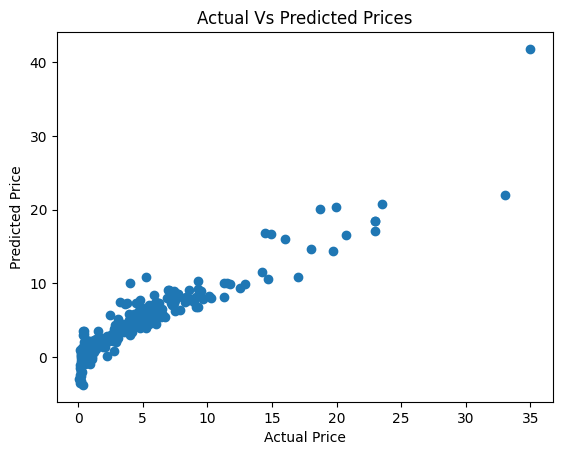

In [99]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

the values are very close to each other which shows its a good prediction.

In [100]:
#predicting on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [101]:
# R squared error on testing data, linear reg
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8365766715026374


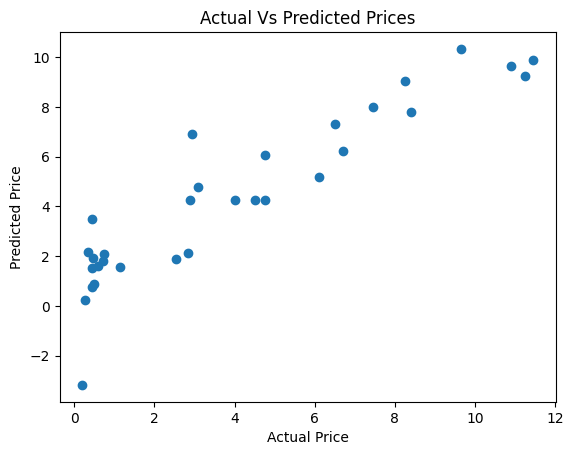

In [102]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

2. Lasso Regression

In [104]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [105]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [106]:
#predicting on training data
training_data_predict = lass_reg_model.predict(X_train)

In [107]:
# R squared error
error_score_1= metrics.r2_score(Y_train, training_data_predict)
print("R squared Error : ", error_score_1)

R squared Error :  0.8427856123435794


Visualizing the actual and predicted prices

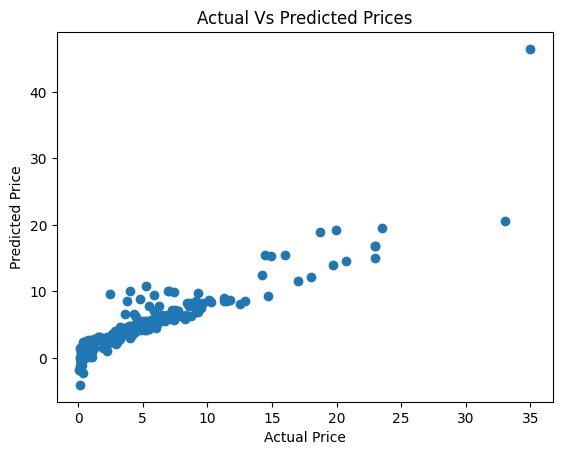

In [108]:
plt.scatter(Y_train, training_data_predict)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

In [109]:
#predicting on test data
test_data_predict = lass_reg_model.predict(X_test)
# R squared error
error_score_2 = metrics.r2_score(Y_test, test_data_predict)
print("R squared Error : ", error_score_2)

R squared Error :  0.8709167941173195


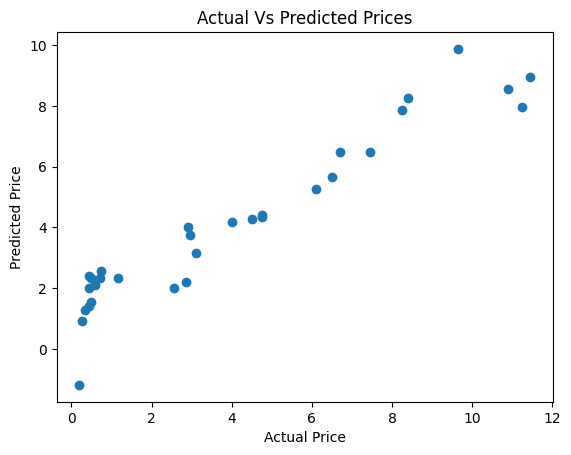

In [110]:
plt.scatter(Y_test, test_data_predict)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

In [111]:
print("Linear Regression coefficients:", lin_reg_model.coef_)
print("Lasso Regression coefficients:", lass_reg_model.coef_)


Linear Regression coefficients: [ 4.09426126e-01  4.38728846e-01 -6.73100388e-06  1.76308349e+00
 -1.00417660e+00  1.50736348e+00 -8.74133473e-01]
Lasso Regression coefficients: [ 3.41436987e-01  5.09941877e-01 -6.89878945e-06  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [115]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [118]:
# Function to preprocess input data
def preprocess_input(year, present_price, km_driven, fuel, seller_type, transmission, owner):
    # Encode the categorical data
    fuel_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
    seller_mapping = {'Dealer': 0, 'Individual': 1}
    transmission_mapping = {'Manual': 0, 'Automatic': 1}

    fuel_encoded = fuel_mapping[fuel]
    seller_encoded = seller_mapping[seller_type]
    transmission_encoded = transmission_mapping[transmission]


    # Create an array with the input data
    input_data = np.array([[year, present_price, km_driven, fuel_encoded, seller_encoded, transmission_encoded, owner]])
    
    return input_data

# Function to predict car price
def predict_price(year,present_price, km_driven, fuel, seller_type, transmission, owner):
    # Preprocess the input data
    input_data = preprocess_input(year,present_price, km_driven, fuel, seller_type, transmission, owner)
    
    # Predict the price
    predicted_price = lin_reg_model.predict(input_data)
    
    return predicted_price[0]

# user input
#year = int(input("Enter the year of purchase: "))
#present_price= int(input("Enter the present price: "))
#km_driven = int(input("Enter the kilometers driven: "))
#fuel = input("Enter the fuel type (Petrol, Diesel, CNG): ")
#seller_type = input("Enter the seller type (Dealer, Individual): ")
#transmission = input("Enter the transmission type (Manual, Automatic): ")
#owner = int(input("Enter the number of previous owners "))

predicted_price = predict_price(2014,5.59,27000,'Petrol','Dealer','Manual',0)
print(f"The predicted selling price of the car is: {predicted_price}")


The predicted selling price of the car is: 3.8390135356471546


C:\Users\samad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
